In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [69]:
df=pd.read_csv('/content/Nike_Sales_Uncleaned.csv')

In [70]:
df


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,NaN,4.0,5358.70,NaN,0.0,11-12-2024,Online,Mumbai,3352.29


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [72]:
df.isnull().sum()

,0
Order_ID,0
Gender_Category,0
Product_Line,0
Product_Name,0
Size,510
Units_Sold,1235
MRP,1254
Discount_Applied,1668
Revenue,0
Order_Date,616


In [73]:
df.isnull().sum()

,0
Order_ID,0
Gender_Category,0
Product_Line,0
Product_Name,0
Size,510
Units_Sold,1235
MRP,1254
Discount_Applied,1668
Revenue,0
Order_Date,616


### Cleaning Size


In [74]:
df['Size'].unique()

array(['M', 'L', 'XL', '11', nan, '9', '6', '12', '7', '10', '8'],
      dtype=object)

In [75]:
df['Size']=df['Size'].astype(str).str.strip()

In [76]:
df['Size']=df['Size'].replace('nan',np.nan)

In [77]:
size_mappng={
    '6': 'S', '7': 'M', '8': 'M',
    '9': 'L', '10': 'L',
    '11': 'XL', '12': 'XL'
}

df['Size']=df['Size'].replace(size_mappng)

In [78]:
df['Size']=df['Size'].str.upper()

In [79]:
df['Size'].unique()

array(['M', 'L', 'XL', nan, 'S'], dtype=object)

In [80]:
df['Gender_Category'].unique()

array(['Kids', 'Women', 'Men'], dtype=object)

In [81]:
df['Size'] = df['Size'].fillna(
    df.groupby('Gender_Category')['Size']
      .transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)

### Cleaning Unit Solds

In [82]:
df['Units_Sold'].unique()

array([nan,  3.,  4.,  1., -1.,  0.,  2.])

In [83]:
df['Units_Sold']=df['Units_Sold'].replace(-1,0)

In [84]:
df['Units_Sold'].isnull().sum()

np.int64(1235)

In [85]:
df['Units_Sold'] = df['Units_Sold'].fillna(
    df.groupby(['Gender_Category', 'Product_Line'])['Units_Sold']
      .transform(lambda x: x.mode()[0] if not x.mode().empty else x.median())
)


In [86]:
df['Units_Sold']=df['Units_Sold'].astype(int)

In [87]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,0,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,0,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,0,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,M,0,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,L,4,5358.70,NaN,0.0,11-12-2024,Online,Mumbai,3352.29


### Cleaning MRP

In [88]:
df['MRP'].isnull().sum()

np.int64(1254)

In [89]:
df['Product_Name'].unique()

array(['SuperRep Go', 'Tiempo Legend', 'Premier III', 'Blazer Mid',
       'React Infinity', 'Flex Trainer', 'Mercurial Superfly',
       'Waffle One', 'Air Jordan', 'Metcon 7', 'Air Zoom', 'Free RN',
       'Kyrie Flytrap', 'Zoom Freak', 'ZoomX Invincible', 'Phantom GT',
       'Pegasus Turbo', 'Dunk Low', 'Air Force 1', 'LeBron 20'],
      dtype=object)

In [90]:
price_map_inr = {
    'SuperRep Go': 8000,
    'Tiempo Legend': 12000,
    'Premier III': 10000,
    'Blazer Mid': 8000,
    'React Infinity': 14000,
    'Flex Trainer': 7000,
    'Mercurial Superfly': 15000,
    'Waffle One': 8000,
    'Air Jordan': 13000,
    'Metcon 7': 13000,
    'Air Zoom': 14000,
    'Free RN': 8000,
    'Kyrie Flytrap': 10000,
    'Zoom Freak': 12000,
    'ZoomX Invincible': 20000,
    'Phantom GT': 15000,
    'Pegasus Turbo': 15000,
    'Dunk Low': 9000,
    'Air Force 1': 9000,
    'LeBron 20': 18000
}

df['MRP'] = df.apply(
    lambda row: price_map_inr.get(row['Product_Name'], row['MRP']),
    axis=1
)


### Cleaning Discount Applied

In [91]:
df['Discount_Applied'].isnull().sum()

np.int64(1668)

In [92]:
df['Discount_Applied']=df['Discount_Applied'].fillna(0)

### Cleaning Order_Date

In [93]:
df['Order_Date'].isnull().sum()

np.int64(616)

In [94]:
df.head(20)


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,0,8000,0.47,0.00,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3,12000,0.00,0.00,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4,10000,0.00,0.00,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,0,8000,0.00,0.00,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,0,14000,0.00,0.00,2024/09/12,Retail,Delhi,187.89
5,2005,Women,Training,Flex Trainer,M,1,7000,0.00,0.00,NaN,Retail,Delhi,1415.98
6,2006,Men,Training,SuperRep Go,M,0,8000,0.00,0.00,04-06-2025,Online,Bangalore,1802.09
7,2007,Kids,Training,SuperRep Go,M,1,8000,0.32,0.00,NaN,Retail,Bangalore,2928.36
8,2008,Women,Soccer,Premier III,XL,0,10000,0.00,0.00,11-10-2024,Online,Hyderabad,-731.18
9,2009,Men,Soccer,Mercurial Superfly,M,4,15000,0.00,0.00,NaN,Online,Pune,3929.61


In [95]:
df['Units_Sold'].unique()

array([0, 3, 4, 1, 2])

In [96]:
def parse_mixed_date(x):
    if pd.isna(x):
        return pd.NaT
    for fmt in ('%Y-%m-%d', '%d-%m-%Y', '%Y/%m/%d', '%d/%m/%Y'):
        try:
            return pd.to_datetime(x, format=fmt)
        except:
            continue
    return pd.NaT

df['Order_Date'] = df['Order_Date'].apply(parse_mixed_date)

In [97]:
df['Order_Date'].isnull().sum()

np.int64(616)

### Cleaning Discount_Applied

In [98]:

df.loc[df['Discount_Applied'] > 1, 'Discount_Applied'] = 0


In [99]:
df['Discount_Applied'].unique()

array([0.47, 0.  , 0.32, 0.86, 0.3 , 0.67, 0.66, 0.5 , 0.16, 0.22, 0.82,
       0.38, 0.83, 0.63, 0.77, 0.57, 0.37, 0.94, 0.78, 0.49, 0.85, 0.21,
       0.45, 0.6 , 0.29, 0.69, 0.27, 0.42, 0.53, 0.41, 0.24, 0.74, 0.95,
       0.48, 0.09, 0.8 , 0.01, 0.59, 0.9 , 0.51, 0.65, 0.97, 0.36, 0.11,
       0.12, 0.31, 0.89, 0.84, 0.39, 0.54, 0.07, 0.26, 0.25, 0.81, 0.08,
       0.71, 0.56, 0.06, 0.91, 0.93, 0.34, 0.05, 0.35, 0.88, 0.2 , 0.03,
       0.14, 0.15, 0.1 , 0.79, 0.04, 0.19, 0.62, 0.33, 0.18, 0.75, 0.99,
       0.55, 0.72, 0.76, 0.7 , 0.44, 0.43, 0.73, 1.  , 0.02, 0.68, 0.96,
       0.23, 0.98, 0.61, 0.28, 0.58, 0.46, 0.17, 0.87, 0.13, 0.52, 0.4 ,
       0.92, 0.64])

### Cleaning Revenue

In [100]:
df['Revenue'] = df['MRP'] * df['Units_Sold'] * (1 - df['Discount_Applied'])

In [101]:
df['Revenue'].unique()

array([    0., 36000., 40000.,  7000.,  5440., 60000.,  8000.,  9100.,
       52000., 30000.,  6720.,  7200., 29760., 39000., 45000., 24000.,
       12000.,  6020., 21000., 27000., 42000.,  1440., 16000., 26000.,
       10920., 28000., 72000., 32000., 12240.,  4800.,  5600., 20400.,
       15000., 56000.,  8120.,  3290., 22800.,  6240., 20000., 18720.,
       48000., 10000., 27720., 18000., 32800.,  2400., 11200., 14000.,
        3120., 23040.,  9000., 35600., 39520., 80000., 28600., 14100.,
        6900.,  8580.,  9230., 20720.,  4200.,  9150., 22500., 11360.,
        5760.,  2160., 54000.,  5760.,  6650.,  6880., 17850., 32400.,
        1680., 21150., 12480.,  9200., 15600., 11400.,  9300., 20100.,
        8400., 29520.,  7500., 19040., 13000., 25800., 18960.,  9500.,
        5900., 13800.,  3120., 35280., 19800., 17520., 39600., 18450.,
       22400.,  1100., 14820., 42480.,  4160.,  4050., 36600., 11840.,
        8840.,  4160., 11040., 13160., 35640.,  1200., 15840., 12320.,
      

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          2500 non-null   int64         
 1   Gender_Category   2500 non-null   object        
 2   Product_Line      2500 non-null   object        
 3   Product_Name      2500 non-null   object        
 4   Size              2500 non-null   object        
 5   Units_Sold        2500 non-null   int64         
 6   MRP               2500 non-null   int64         
 7   Discount_Applied  2500 non-null   float64       
 8   Revenue           2500 non-null   float64       
 9   Order_Date        1884 non-null   datetime64[ns]
 10  Sales_Channel     2500 non-null   object        
 11  Region            2500 non-null   object        
 12  Profit            2500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 254.0+ KB


In [103]:
df


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,0,8000,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3,12000,0.00,36000.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4,10000,0.00,40000.0,NaT,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,0,8000,0.00,0.0,2024-10-04,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,0,14000,0.00,0.0,2024-09-12,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3,10000,0.00,30000.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,0,10000,0.00,0.0,NaT,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,M,0,12000,0.52,0.0,2025-07-02,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,L,4,20000,0.00,80000.0,2024-12-11,Online,Mumbai,3352.29


### Data Visualization

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Soccer'),
  Text(1, 0, 'Training'),
  Text(2, 0, 'Basketball'),
  Text(3, 0, 'Running'),
  Text(4, 0, 'Lifestyle')])

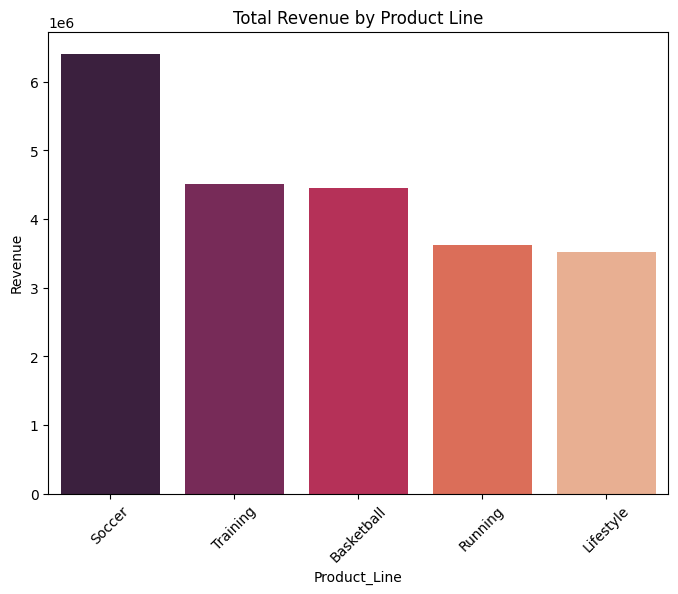

In [104]:
plt.figure(figsize=(8,6))
grp1=df.groupby(df['Product_Line'],as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False)
sns.barplot(data=grp1, x='Product_Line', y='Revenue', palette='rocket',hue='Product_Line',legend=False)
plt.title("Total Revenue by Product Line")
plt.xticks(rotation=45)


In [105]:
plt.figure(figsize=(10,8))
grp2=df.groupby(['Product_Line','Product_Name'],as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False)
a=px.bar(grp2, x='Product_Line', y='Revenue', title="Total Revenue by Product Line and Product", color='Product_Name')
a.show()

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Total Revenue by Gender Category')

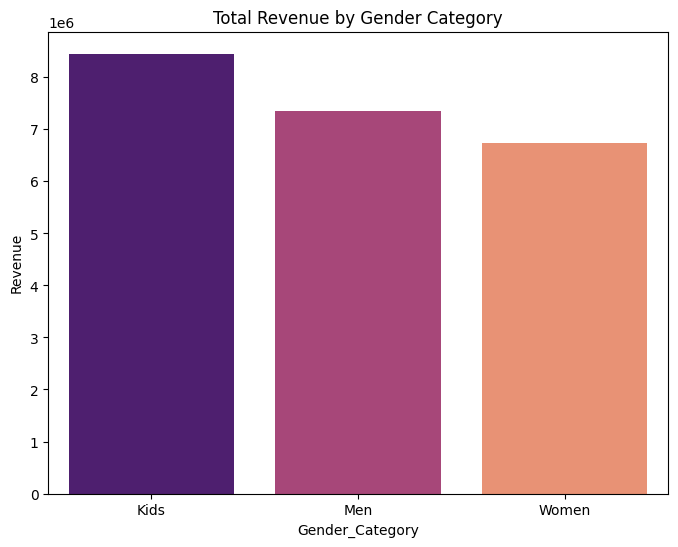

In [106]:
plt.figure(figsize=(8,6))
grp3=df.groupby('Gender_Category',as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False)
z=sns.barplot(data=grp3, x='Gender_Category', y='Revenue', palette='magma',hue='Gender_Category',legend=False)
# for i in z.containers:
#     z.bar_label(i)
plt.title("Total Revenue by Gender Category")

In [107]:
grp4=df['Sales_Channel'].value_counts().reset_index()
grp4.columns=['Sales_Channel','Count']
pie_cht=px.pie(grp4, values='Count', names='Sales_Channel', title='Sales Channel Distribution')
pie_cht.show()

crest

Text(0.5, 1.0, 'Top 10 Products by Revenue')

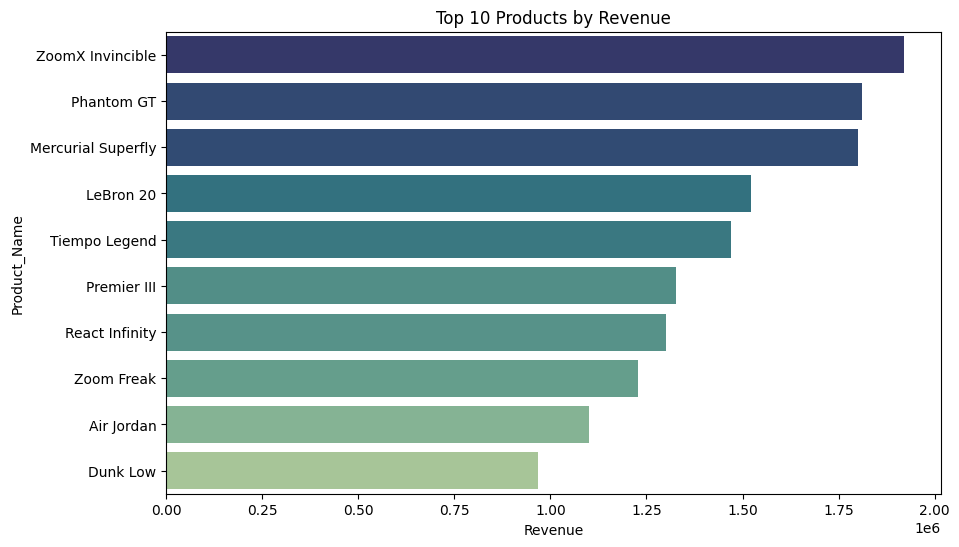

In [108]:
grp5= df.groupby('Product_Name', as_index=False)['Revenue'].sum().sort_values(by='Revenue', ascending=False).head(10)
plt.figure(figsize=(10, 6))
y=sns.barplot(data=grp5, x='Revenue', y='Product_Name', palette='crest',hue='Revenue',legend=False)
# for i in y.containers:
#     y.bar_label(i)
plt.title("Top 10 Products by Revenue")

Text(0.5, 1.0, 'Revenue by date and Gender Category')

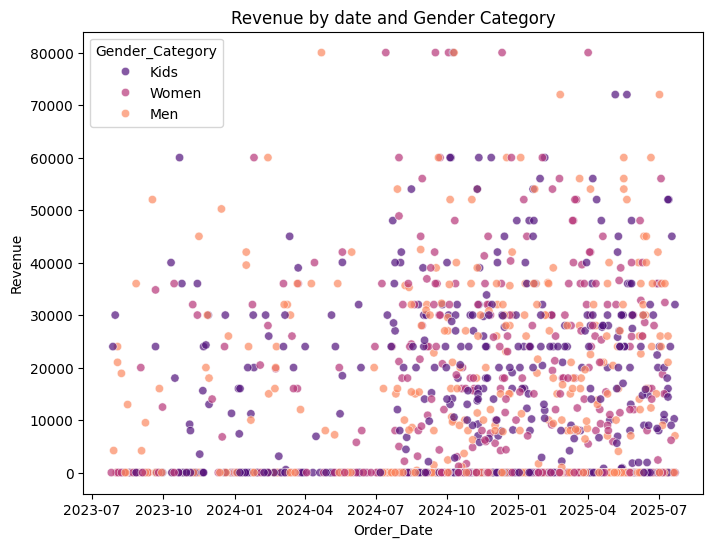

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,x='Order_Date',y='Revenue',hue='Gender_Category',palette='magma',alpha=0.7)
plt.title('Revenue by date and Gender Category')


Text(0, 0.5, 'Frequency')

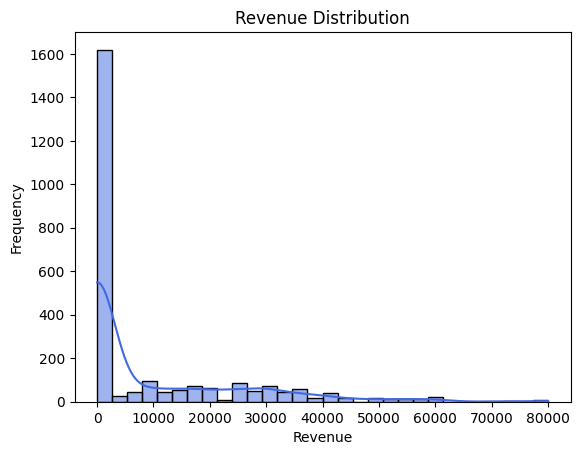

In [110]:
sns.histplot(df['Revenue'], bins=30, kde=True, color='royalblue')
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")

In [111]:
px.histogram(df, x='Revenue', nbins=30, title="Revenue Distribution")

### Summary

***Data Cleaning:***

Size Column: Cleaned mixed data types, mapped numerical sizes to categorical (S, M, L, XL), made values uppercase, and imputed missing values using gender-based mode.

Units_Sold Column: Corrected negative values to zero, imputed missing values using mode/median based on 'Gender_Category' and 'Product_Line', and converted to integer.

MRP Column: Imputed missing values using a predefined price_map_inr based on 'Product_Name'.

Discount_Applied Column: Filled missing values with zero and capped values greater than 1 to 0.

Order_Date Column: Converted to datetime objects, handling multiple date formats.

Revenue Column: Recalculated based on cleaned 'MRP', 'Units_Sold', and 'Discount_Applied'.

***Data Visualization:***

Bar plot: Total Revenue by Product_Line.

Bar plot (Plotly): Total Revenue by Product_Line and Product_Name.

Bar plot: Total Revenue by Gender_Category.

Pie chart: Sales_Channel Distribution.

Bar plot: Top 10 Products by Revenue (Product_Name).

Scatter plot: Revenue by Order_Date and Gender_Category.

Histogram (Seaborn): Revenue Distribution.

Histogram (Plotly Express): Revenue Distribution.


***Data Visualization Summary:***
Several visualizations were created to explore different aspects of the cleaned sales data:

Total Revenue by Product Line: A bar plot showed the total revenue generated by each product line, helping to identify top-performing categories.

Total Revenue by Product Line and Product: A more detailed bar chart visualized revenue for individual products within each product line, giving insight into specific product performance.

Total Revenue by Gender Category: A bar plot illustrated the revenue contribution from different gender categories (Kids, Women, Men).

Sales Channel Distribution: A pie chart displayed the distribution of sales across different sales channels (Online and Retail).

Top 10 Products by Revenue: A bar plot highlighted the ten products generating the highest revenue.

Revenue by Date and Gender Category: A scatter plot showed revenue trends over time, segmented by gender category, to observe any temporal patterns or differences.

Revenue Distribution: Histograms were used to visualize the overall distribution of revenue, providing insights into its spread and common ranges.


